# Data Augmentation by ImageDataGenerator
for details, please refer to https://keras.io/preprocessing/image/#imagedatagenerator-class 

In [1]:
import glob
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
IMG_DIM = (150, 150)
np.random.seed(42)

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Tommy/opt/anaconda3/e

In [2]:
# load data
_data_path = '../datasets and figures/asset2/dog_cat/'


# _data_path = './asset2/dog_cat/'
train_dir = _data_path+"training_data/"
valid_dir = _data_path+"validation_data/"
test_dir = _data_path+"test_data/"

train_files = glob.glob(train_dir+"*") 
print(len(train_files))
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in train_files]
print(train_imgs.shape)

validation_files = glob.glob(valid_dir+'*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in validation_files]

test_files = glob.glob(test_dir+'*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in test_files]
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape,
     '\ttest dataset shape:', test_imgs.shape)

3000
(3000, 150, 150, 3)
Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3) 	test dataset shape: (1000, 150, 150, 3)


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
test_labels_enc = le.transform(test_labels)

In [4]:
## introduce ImageDataGenerator in details

# To generate the sample from ImageDataGenerator on totation and horizontal_flip
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #zoom_range=0.3, 
                                   rotation_range=50,
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)


original image


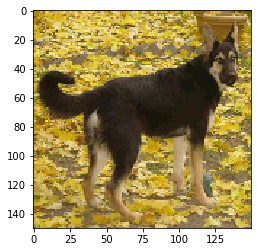

In [6]:
img_id = 9
plt.figure()
plt.imshow(train_imgs[img_id]/255.)

print("original image")

In [10]:
# train_imgs[img_id]/255.

Generated images: 
Labels: ['', '', '', '', '', '', '', '']


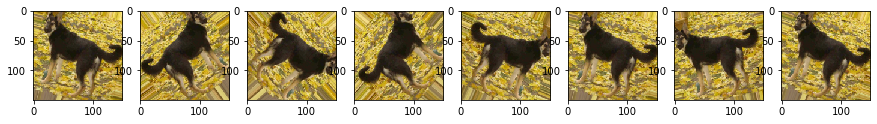

In [13]:
#To show the generated image which was desigened with ImageDataGenerator
#img_id = 9
temp_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
# temp = [next(temp_generator) for i in range(0,5)]
temp = [next(temp_generator) for i in range(0,8)]
# fig, ax = plt.subplots(1,5, figsize=(15, 6))
fig, ax = plt.subplots(1,8, figsize=(15, 6))


print("Generated images: ")
print('Labels:', [item[1][0] for item in temp])
# l = [ax[i].imshow(temp[i][0][0]) for i in range(0,5)]
l = [ax[i].imshow(temp[i][0][0]) for i in range(0,8)]

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen  = ImageDataGenerator(rescale=1./255)

In [15]:
# To generate the sample from ImageDataGenerator
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

### zoom_range

In [18]:
## introduce ImageDataGenerator in details

# To generate the sample from ImageDataGenerator on zoom_range
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3, 
                                   #rotation_range=50,
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   #horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)


Labels: ['', '', '', '', '']


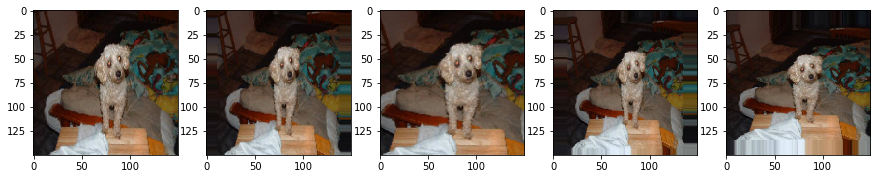

In [19]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
temp_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
temp = [next(temp_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in temp])
l = [ax[i].imshow(temp[i][0][0]) for i in range(0,5)]

### rotation

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #zoom_range=0.3, 
                                   rotation_range=50,
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   #horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['', '', '', '', '']


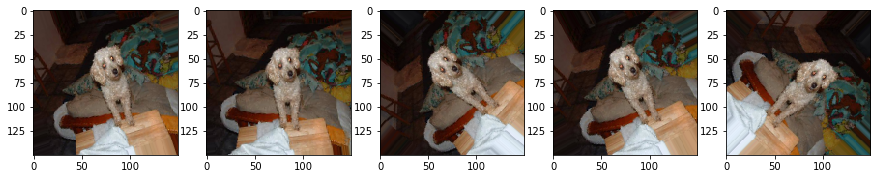

In [21]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
temp_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
temp = [next(temp_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in temp])
l = [ax[i].imshow(temp[i][0][0]) for i in range(0,5)]

### shift

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #zoom_range=0.3, 
                                   #rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   #horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )

Labels: ['', '', '', '', '']


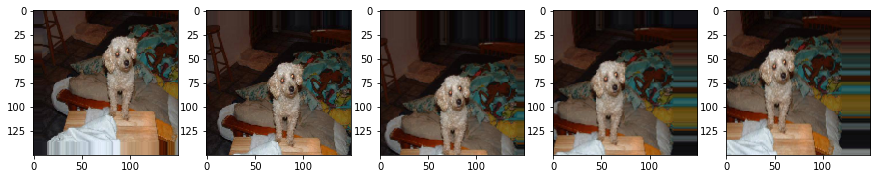

In [23]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
temp_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
temp = [next(temp_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in temp])
l = [ax[i].imshow(temp[i][0][0]) for i in range(0,5)]

### flip

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #zoom_range=0.3, 
                                   #rotation_range=50,
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2, 
                                   #shear_range=0.2, 
                                   horizontal_flip=True, 
                                   #fill_mode='nearest'
                                   )

Labels: ['', '', '', '', '']


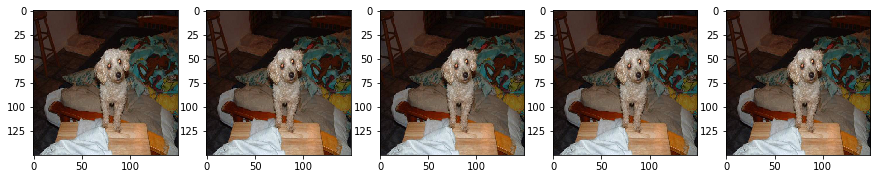

In [25]:
#To show the generated image which was desigened with ImageDataGenerator
img_id = 1991
temp_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
temp = [next(temp_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in temp])
l = [ax[i].imshow(temp[i][0][0]) for i in range(0,5)]

# 2 Data augmentation with Rotation

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=60)

val_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
# To generate the sample from ImageDataGenerator
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

In [28]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
# regularization of dropout
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6927 - accuracy: 0.5220 - val_loss: 0.6681 - val_accuracy: 0.5590
Epoch 2/30
100/100 [==============================] - 32s 322ms/step - loss: 0.6838 - accuracy: 0.5601 - val_loss: 0.6644 - val_accuracy: 0.6526
Epoch 3/30
100/100 [==============================] - 32s 321ms/step - loss: 0.6602 - accuracy: 0.6043 - val_loss: 0.6217 - val_accuracy: 0.6450
Epoch 4/30
100/100 [==============================] - 33s 328ms/step - loss: 0.6508 - accuracy: 0.6235 - val_loss: 0.6907 - val_accuracy: 0.6667
Epoch 5/30
100/100 [==============================] - 32s 321ms/step - loss: 0.6276 - accuracy: 0.6522 - val_loss: 0.5744 - val_accuracy: 0.6390
Epoch 6/30
100/100 [==============================] - 32s 324ms/step - loss: 0.6211 - accuracy: 0.6602 - val_loss: 0.5006 - val_accuracy: 0.7080
Epoch 7/30
100/100 [==============================] - 32s 321ms/step - loss: 0.6076 - accuracy: 0.6723 - val_loss: 0.5973 - val_ac

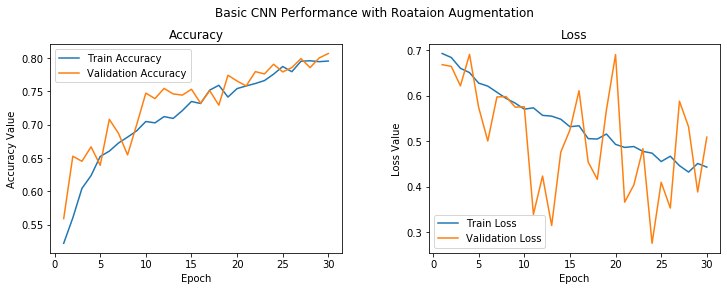

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with Roataion Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [23]:
model.save('cats_dogs_cnn_img_rotation.h5')

# Exercise 1 data agumentation with flip

In [24]:
# To expand the samples using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [26]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/30
100/100 [==============================] - 31s 309ms/step - loss: 0.4193 - accuracy: 0.8090 - val_loss: 0.1855 - val_accuracy: 0.7510
Epoch 2/30
100/100 [==============================] - 31s 309ms/step - loss: 0.4064 - accuracy: 0.8104 - val_loss: 0.5449 - val_accuracy: 0.7895
Epoch 3/30
100/100 [==============================] - 31s 310ms/step - loss: 0.4013 - accuracy: 0.8231 - val_loss: 0.6325 - val_accuracy: 0.7780
Epoch 4/30
100/100 [==============================] - 31s 309ms/step - loss: 0.3793 - accuracy: 0.8330 - val_loss: 0.3440 - val_accuracy: 0.8006
Epoch 5/30
100/100 [==============================] - 31s 309ms/step - loss: 0.3743 - accuracy: 0.8374 - val_loss: 0.5648 - val_accuracy: 0.8150
Epoch 6/30
100/100 [==============================] - 31s 310ms/step - loss: 0.3600 - accuracy: 0.8328 - val_loss: 0.2252 - val_accuracy: 0.8228
Epoch 7/30
100/100 [==============================] - 31s 311ms/step - loss: 0.3626 - accuracy: 0.8477 - val_loss: 0.3478 - val_ac

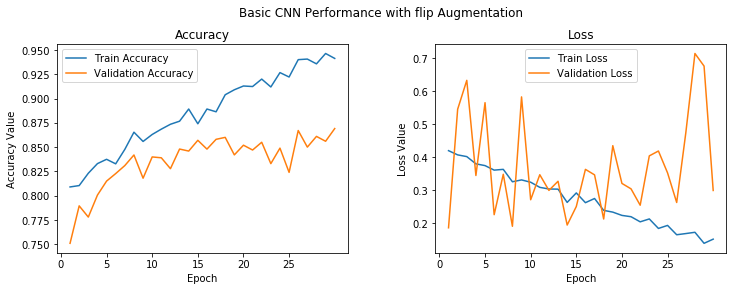

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with flip Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 30, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 30, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Exercise 2 data augmentation with shift

In [29]:
# To expand the samples using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,width_shift_range=0.2, height_shift_range=0.2, )

val_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [31]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/30
100/100 [==============================] - 32s 317ms/step - loss: 0.4600 - accuracy: 0.7927 - val_loss: 0.2774 - val_accuracy: 0.8400
Epoch 2/30
100/100 [==============================] - 31s 314ms/step - loss: 0.4282 - accuracy: 0.7950 - val_loss: 0.4923 - val_accuracy: 0.7694
Epoch 3/30
100/100 [==============================] - 31s 315ms/step - loss: 0.4047 - accuracy: 0.8190 - val_loss: 0.4535 - val_accuracy: 0.8480
Epoch 4/30
100/100 [==============================] - 31s 315ms/step - loss: 0.4195 - accuracy: 0.8158 - val_loss: 0.1689 - val_accuracy: 0.8580
Epoch 5/30
100/100 [==============================] - 31s 314ms/step - loss: 0.4105 - accuracy: 0.8181 - val_loss: 0.2737 - val_accuracy: 0.8390
Epoch 6/30
100/100 [==============================] - 31s 315ms/step - loss: 0.3952 - accuracy: 0.8220 - val_loss: 0.2172 - val_accuracy: 0.8721
Epoch 7/30
100/100 [==============================] - 32s 315ms/step - loss: 0.3902 - accuracy: 0.8254 - val_loss: 0.2683 - val_ac

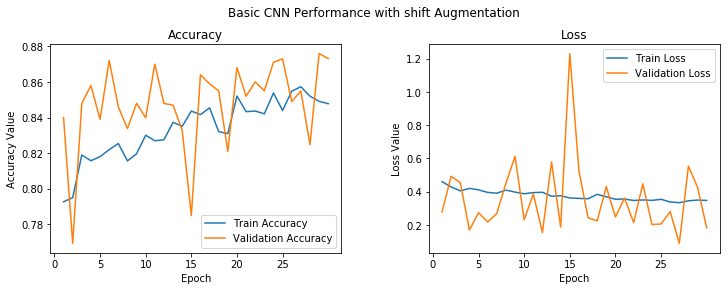

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with shift Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 30, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 30, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Exercise 3 data agumentation with all constraints

In [34]:
# To expand the samples using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50, zoom_range=0.3, 
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [36]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 32s 324ms/step - loss: 0.4480 - accuracy: 0.7913 - val_loss: 0.5798 - val_accuracy: 0.8610
Epoch 2/100
100/100 [==============================] - 32s 315ms/step - loss: 0.4410 - accuracy: 0.7964 - val_loss: 0.3227 - val_accuracy: 0.8348
Epoch 3/100
100/100 [==============================] - 31s 314ms/step - loss: 0.4437 - accuracy: 0.7911 - val_loss: 0.2864 - val_accuracy: 0.8220
Epoch 4/100
100/100 [==============================] - 32s 317ms/step - loss: 0.4356 - accuracy: 0.8023 - val_loss: 0.1174 - val_accuracy: 0.8761
Epoch 5/100
100/100 [==============================] - 32s 315ms/step - loss: 0.4389 - accuracy: 0.7953 - val_loss: 0.3434 - val_accuracy: 0.8540
Epoch 6/100
100/100 [==============================] - 32s 317ms/step - loss: 0.4359 - accuracy: 0.8048 - val_loss: 0.2633 - val_accuracy: 0.8610
Epoch 7/100
100/100 [==============================] - 32s 315ms/step - loss: 0.4410 - accuracy: 0.8037 - val_loss: 0.2337 -

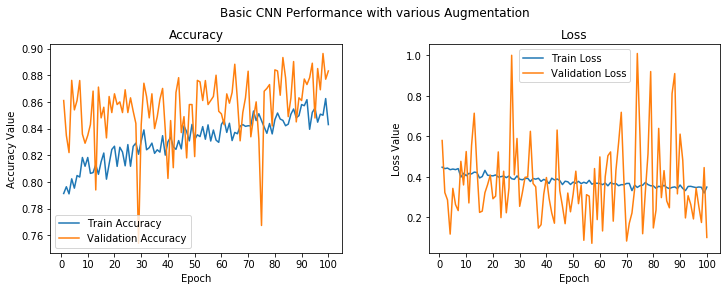

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance with various Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")